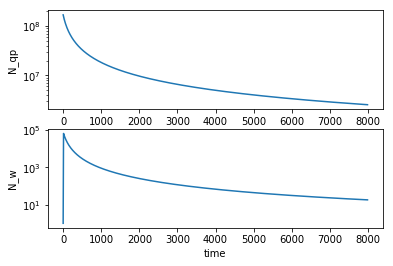

N_qp saturated = 2.549941e+06


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(N,t,params):
    N_qp, N_w = N
    R, V, G_B, G_es, N_w0 = params
    derivs = [-R*N_qp**2/V + 2*G_B*N_w, 
             R*N_qp**2/(2*V) - G_B*N_w - G_es*(N_w - N_w0)]
    return derivs

# Parameters
V = 10.**3 # um^3
R = 2.*V/(17.*10**4)**2. # ns^-1*um^3
G_B = 1/.26 # ns^-1
G_es = 1/.11 # ns^-1
N_w0 = 10.**0 # arb.
params = [R, V, G_B, G_es, N_w0]

# Initial values
N_qp = np.sqrt(2.*V/R)*10**3 #arb.
N_w = N_w0 #arb.
N0 = [N_qp, N_w]

# Time array
tStop = 8000. # ns
tInc = 10. # ns
t = np.arange(0., tStop, tInc)

psoln = odeint(f, N0, t, args=(params,))

fig = plt.figure(1)

ax1 = fig.add_subplot(211)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('N_qp')
ax1.set_yscale('log')

ax2 = fig.add_subplot(212)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('N_w')
ax2.set_yscale('log')

plt.show()